# Topics Covered:
* Decision Tree
* Random Forest
* Gradient Boosting Method(GBM)

## Decision Tree 
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, accuracy_score

In [2]:
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
# import some data to play with
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Splitting the Data-Set into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123)

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Precision: %.3f' % precision_score(y_test, y_pred_dt, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, y_pred_dt, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_dt))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_dt, average='weighted'))

In [5]:
## Random Forest

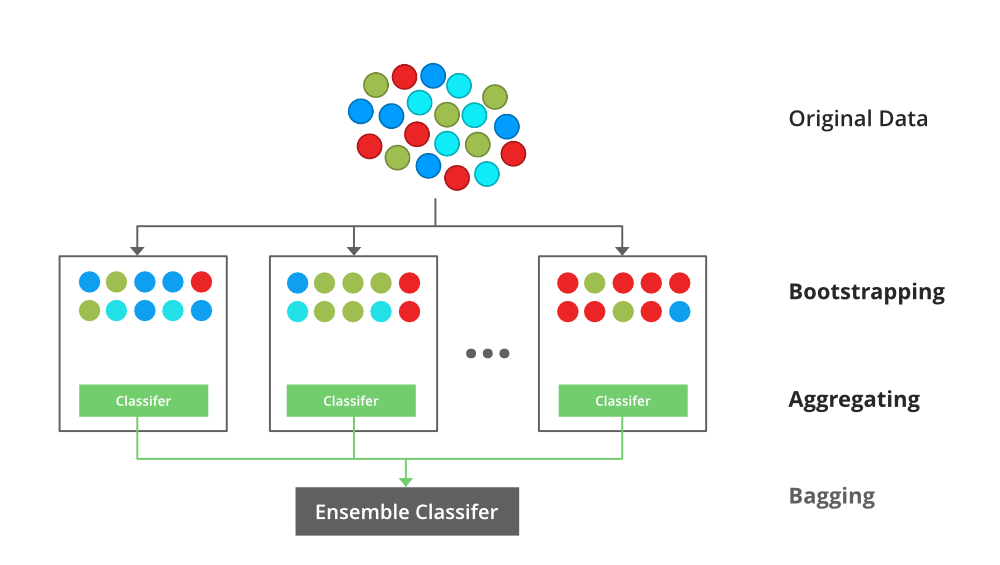

In [6]:
from sklearn.ensemble import RandomForestClassifier
# Initiating the model:
rf = RandomForestClassifier(random_state=42)
rf.fit( X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
# Predict probabilities
probs_y = rf.predict_proba(X_test)
probs_y = np.round(probs_y, 2)

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[40  1]
 [ 0 73]]


In [9]:
print('Precision: %.3f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred, average='weighted'))

Precision: 0.991
Recall: 0.991
Accuracy: 0.991
F1 Score: 0.991


In [10]:
# Create the random grid
random_grid = {'n_estimators': [4, 8, 16],                  # Number of trees in random forest
               'max_features': ['auto', 'sqrt'],              # Number of features to consider at every split
               'max_depth': [8, 12, 16],                       # Maximum number of levels in tree
               'min_samples_split': [4 , 8, 16],              # Minimum number of samples required to split a node
               'min_samples_leaf': [4, 8],                    # Minimum number of samples required at each leaf node
               'bootstrap': [True, False]}                    # Method of selecting samples for training each tree

In [11]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=1, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [8, 12, 16],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 8],
                                        'min_samples_split': [4, 8, 16],
                                        'n_estimators': [4, 8, 16]},
                   random_state=42, verbose=1)

In [12]:
rf_random.best_params_

{'n_estimators': 4,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 16,
 'bootstrap': False}

In [13]:
rf_best = RandomForestClassifier(n_estimators = 4, min_samples_split = 8, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 16, bootstrap=False) 
rf_best.fit( X_train, y_train) 

RandomForestClassifier(bootstrap=False, max_depth=16, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=8, n_estimators=4)

In [14]:
# Predicting the Test set results
y_pred_best = rf_best.predict(X_test)
# Predict probabilities
probs_y_best = rf_best.predict_proba(X_test)
probs_y_best = np.round(probs_y_best, 2)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred_best) 
print(cm)

[[38  3]
 [ 0 73]]


In [15]:
print('Precision: %.3f' % precision_score(y_test, y_pred_best, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, y_pred_best, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_best))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_best, average='weighted'))

Precision: 0.975
Recall: 0.974
Accuracy: 0.974
F1 Score: 0.973


In [16]:
## Gradient Boosting Method(GBM)

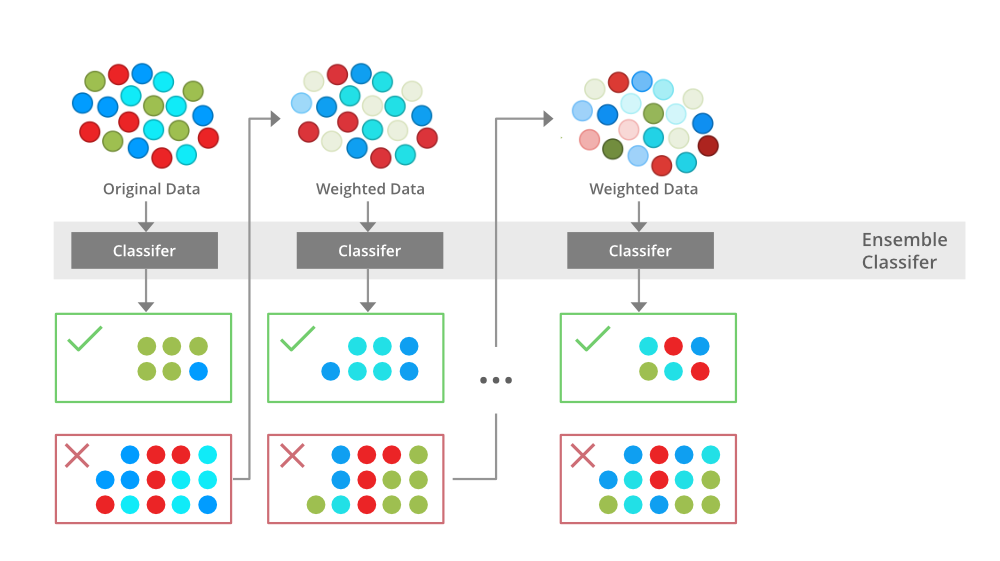

Accuracy of the GBM on test set: 0.974
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



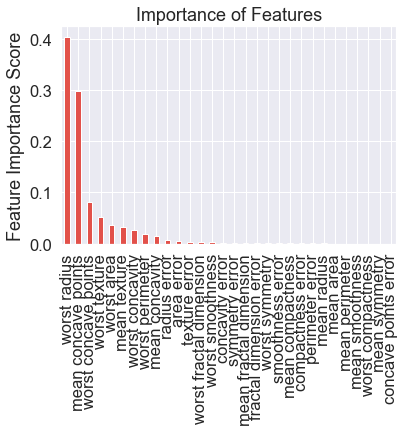

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


baseline = GradientBoostingClassifier(random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In [18]:
p_test3 = {'learning_rate':[0.1,0.01,0.001], 'n_estimators':[4, 8, 18]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10), 
            param_grid = p_test3, scoring='roc_auc', n_jobs=4, cv=3)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 18}, 0.9735882726600001)

In [19]:
p_test2 = {'learning_rate':[0.1], 
           'n_estimators':[18],
           'max_depth':[4, 8, 12],
           'min_samples_split':[2, 4, 8],
           'min_samples_leaf':[2, 4],
           'max_features':[5, 6],
           'subsample':[0.7, 0.8, 0.9]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10), 
            param_grid = p_test2, scoring='roc_auc',n_jobs=4, cv=3)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1,
  'max_depth': 8,
  'max_features': 5,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 18,
  'subsample': 0.9},
 0.9891737555909182)

Accuracy of the GBM on test set: 0.974
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.99      0.97      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



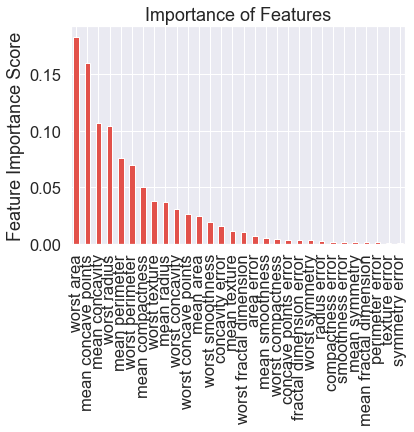

In [20]:
new=GradientBoostingClassifier(learning_rate=0.1, n_estimators=18, max_depth=8, min_samples_split=2,
                               min_samples_leaf=4, max_features=5 , subsample=0.9, random_state=10)
new.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

In [21]:
# Predicting the Test set results
y_pred_best = new.predict(X_test)
# Predict probabilities
probs_y_best = new.predict_proba(X_test)
probs_y_best = np.round(probs_y_best, 2)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred_best) 
print(cm)

[[40  1]
 [ 2 71]]


In [22]:
print('Precision: %.3f' % precision_score(y_test, y_pred_best, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, y_pred_best, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_best))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_best, average='weighted'))

Precision: 0.974
Recall: 0.974
Accuracy: 0.974
F1 Score: 0.974


In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

#run models
baseline = GradientBoostingClassifier(random_state=10)
baseline.fit(X_train,y_train)

model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=18, random_state=10)
model1.fit(X_train,y_train)

new=GradientBoostingClassifier(learning_rate=0.1, n_estimators=18,max_depth=6, min_samples_split=2,
                               min_samples_leaf=2,max_features=6 , subsample=0.8, random_state=10)
new.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, max_features=6, min_samples_leaf=2,
                           n_estimators=18, random_state=10, subsample=0.8)

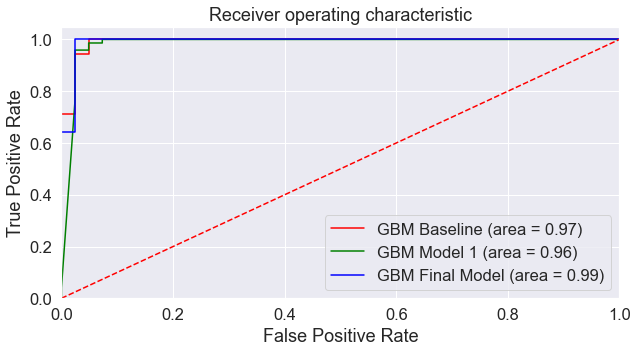

In [24]:
#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,5))
plt.plot(fprB, tprB, c='r', label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, c='g', label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, c ='b', label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

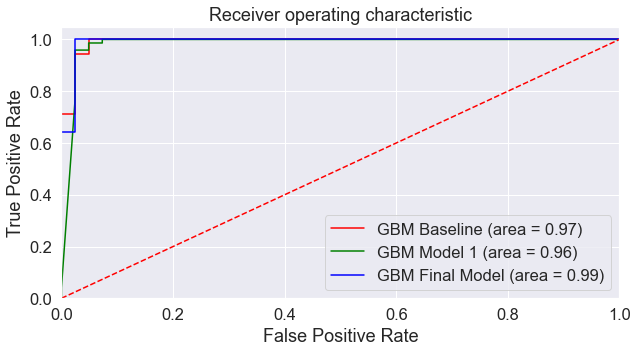

In [25]:
#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,5))
plt.plot(fprB, tprB, c='r', label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, c='g', label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, c ='b', label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()